In [3]:
import pandas as pd

# Load variable names from Excel
var_list = pd.read_excel("credit-data-2010/PAKDD2010_VariablesList.XLS", usecols=[1], header=None, skiprows=1)
column_names = var_list.iloc[:, 0].dropna().tolist()

# Ensure unique column names
def make_unique(names):
    seen = {}
    new_names = []
    for name in names:
        if name in seen:
            seen[name] += 1
            new_names.append(f"{name}_{seen[name]}")  # Append a suffix to duplicates
        else:
            seen[name] = 0
            new_names.append(name)
    return new_names

column_names = make_unique(column_names)

# Load datasets with fixed column names
train_df = pd.read_csv(
    "credit-data-2010/PAKDD2010_Modeling_data.txt",
    sep="\t",
    names=column_names,
    skiprows=1,
    encoding="latin1"  # Change this based on the detected encoding
)

test_df = pd.read_csv(
    "credit-data-2010/PAKDD2010_Prediction_data.txt",
    sep="\t",
    names=column_names[:-1],  # No target column
    skiprows=1,
    encoding="latin1"
)


# Quick check
print(train_df.head())
print(test_df.head())


ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [2]:
# Display basic information about the data
print("Train Data Info:")
print(train_df.info())  # Structure of the data

print("\nTest Data Info:")
print(test_df.info())

# Show the first few rows of the datasets
print("\nTrain Data Sample:")
print(train_df.head())

print("\nTest Data Sample:")
print(test_df.head())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       49999 non-null  int64  
 1   CLERK_TYPE                      49999 non-null  object 
 2   PAYMENT_DAY                     49999 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     49999 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          49999 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             49999 non-null  int64  
 6   SEX                             49999 non-null  object 
 7   MARITAL_STATUS                  49999 non-null  int64  
 8   QUANT_DEPENDANTS                49999 non-null  int64  
 9   EDUCATION_LEVEL                 49999 non-null  int64  
 10  STATE_OF_BIRTH                  49999 non-null  object 
 11  CITY_OF_BIRTH                   49999 non-null  object 
 12  NACIONALITY    

In [3]:
# Descriptive statistics for the numerical features
print("\nTrain Data Description:")
print(train_df.describe())

print("\nTest Data Description:")
print(test_df.describe())



Train Data Description:
          ID_CLIENT   PAYMENT_DAY  QUANT_ADDITIONAL_CARDS  \
count  49999.000000  49999.000000                 49999.0   
mean   25001.000000     12.870077                     0.0   
std    14433.612391      6.608357                     0.0   
min        2.000000      1.000000                     0.0   
25%    12501.500000     10.000000                     0.0   
50%    25001.000000     10.000000                     0.0   
75%    37500.500000     15.000000                     0.0   
max    50000.000000     25.000000                     0.0   

       POSTAL_ADDRESS_TYPE  MARITAL_STATUS  QUANT_DEPENDANTS  EDUCATION_LEVEL  \
count         49999.000000    49999.000000      49999.000000          49999.0   
mean              1.006540        2.148323          0.650513              0.0   
std               0.080607        1.322751          1.193666              0.0   
min               1.000000        0.000000          0.000000              0.0   
25%               1.

In [4]:
# Rename 'EDUCATION_LEVEL_1' to 'UNKNOWN_FEATURE' in both datasets
train_df = train_df.rename(columns={'EDUCATION_LEVEL_1': 'UNKNOWN_FEATURE'})
test_df = test_df.rename(columns={'EDUCATION_LEVEL_1': 'UNKNOWN_FEATURE'})


In [5]:
# Check for missing values in the train data
missing_train = train_df.isnull().sum()
print("\nMissing Values in Train Data:")
print(missing_train[missing_train > 0])

# Check for missing values in the test data
missing_test = test_df.isnull().sum()
print("\nMissing Values in Test Data:")
print(missing_test[missing_test > 0])



Missing Values in Train Data:
RESIDENCE_TYPE           1349
MONTHS_IN_RESIDENCE      3777
PROFESSIONAL_CITY       33782
PROFESSIONAL_BOROUGH    33782
PROFESSION_CODE          7756
OCCUPATION_TYPE          7313
MATE_PROFESSION_CODE    28883
UNKNOWN_FEATURE         32337
dtype: int64

Missing Values in Test Data:
QUANT_ADDITIONAL_CARDS    18726
CITY_OF_BIRTH                10
RESIDENCE_TYPE              560
MONTHS_IN_RESIDENCE        2524
PROFESSIONAL_CITY         14344
PROFESSIONAL_BOROUGH      14344
OCCUPATION_TYPE            2372
MATE_PROFESSION_CODE      18878
UNKNOWN_FEATURE           19609
dtype: int64


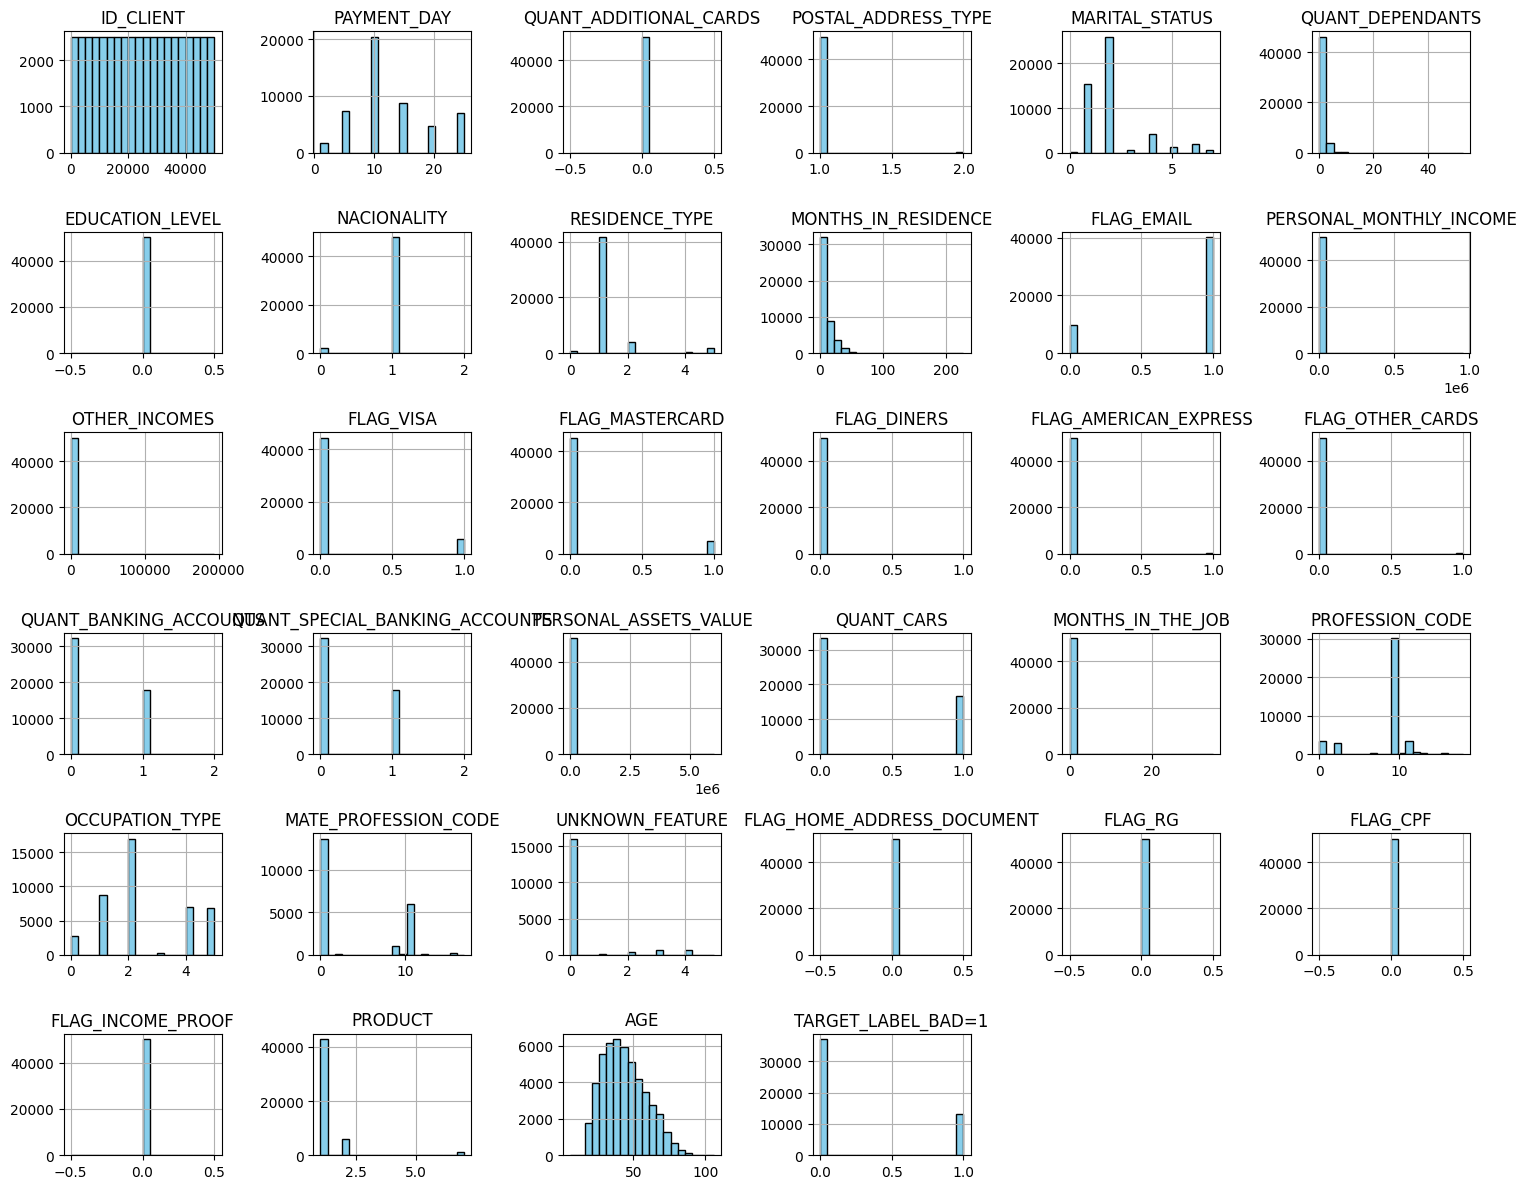

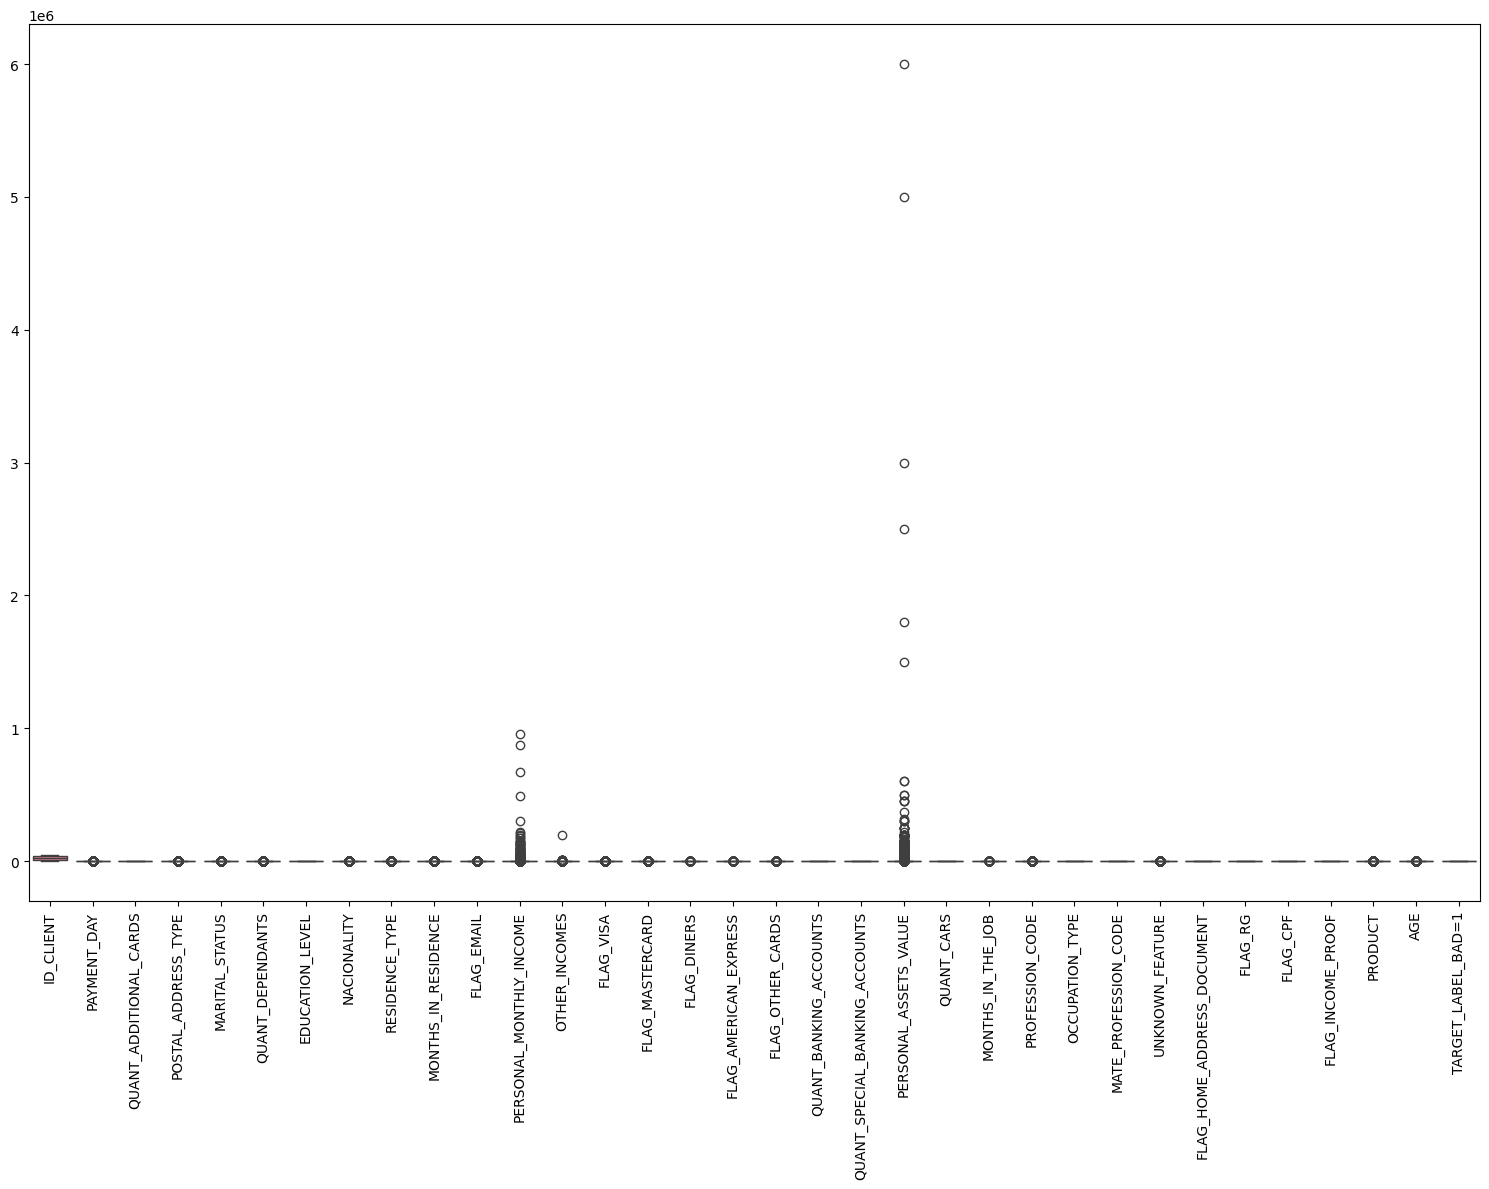

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical features
train_df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Box plots to detect outliers
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
sns.boxplot(data=train_df[numerical_features])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


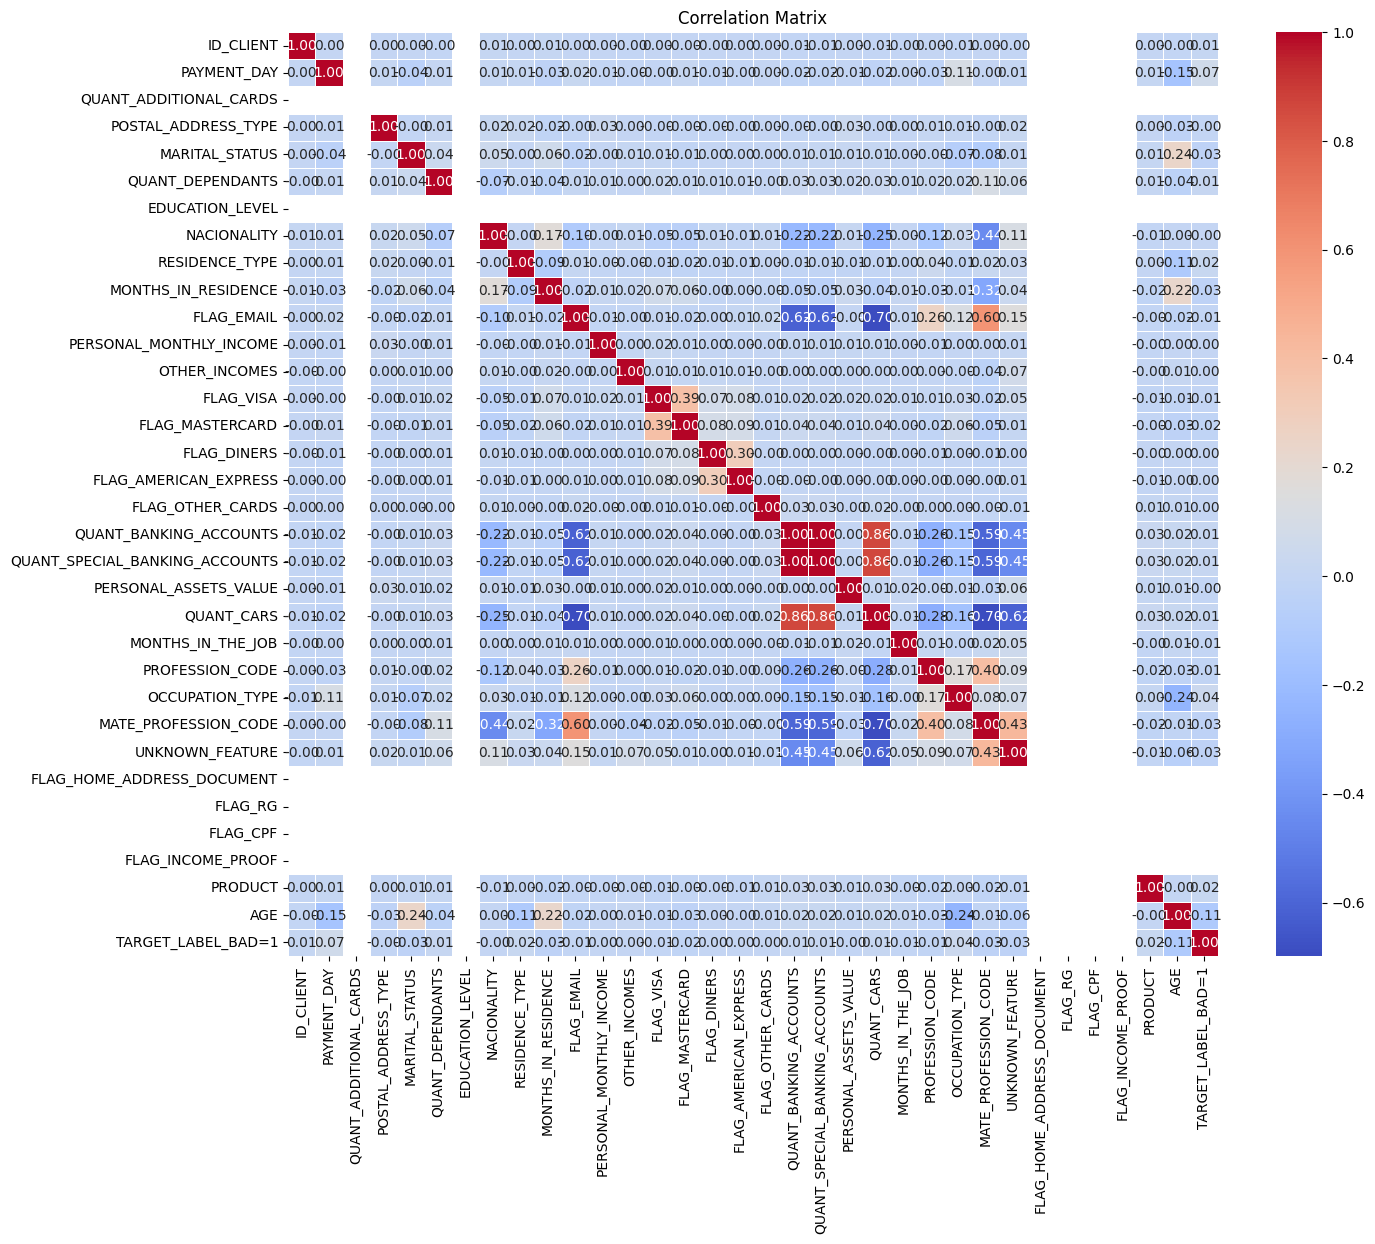

In [7]:
# Select only numeric columns for the correlation matrix
numeric_df = train_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


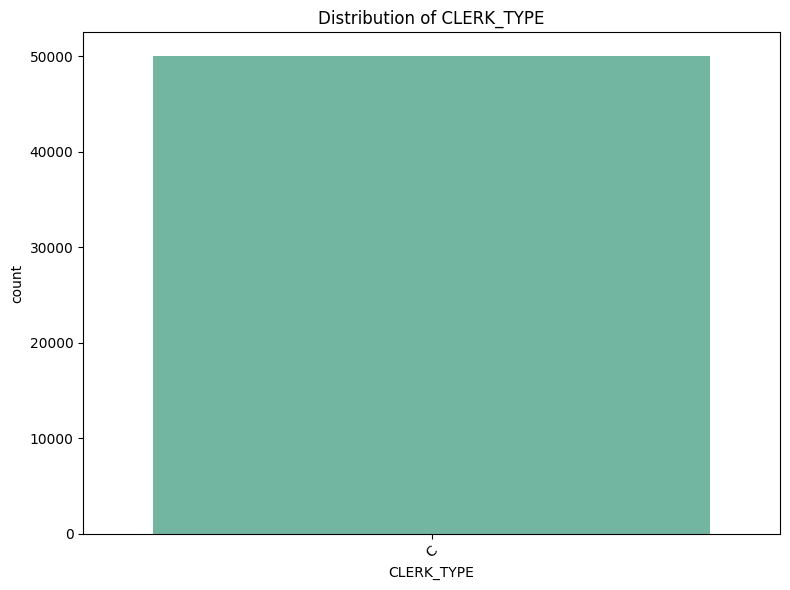

C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


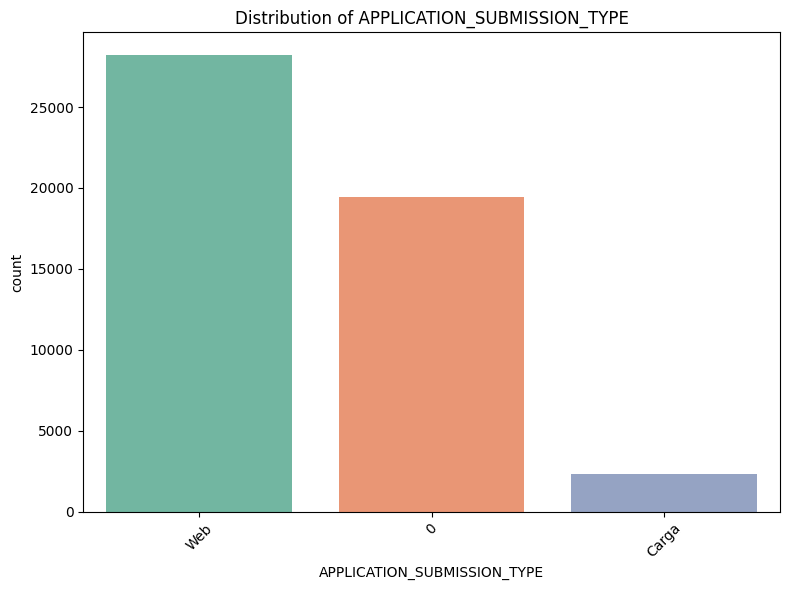

C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


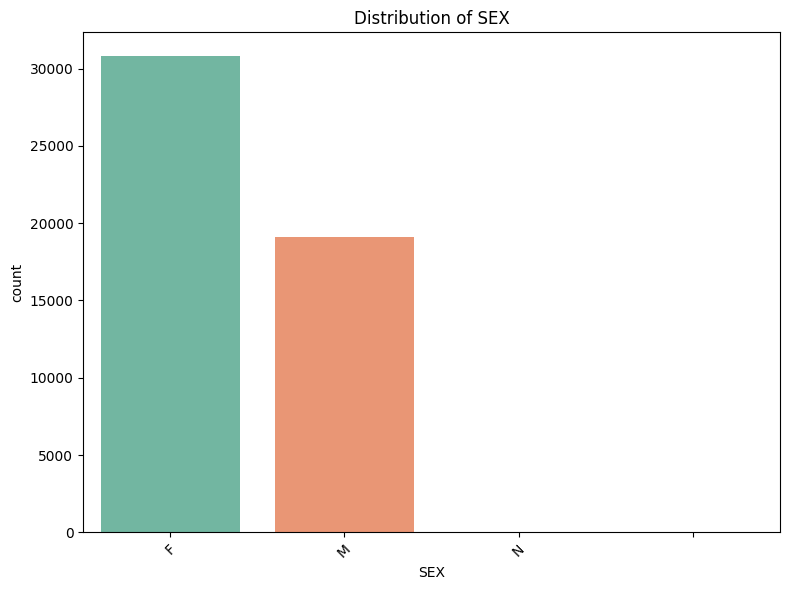

Feature: STATE_OF_BIRTH (Unique Values: 29)
Top 10 Most Frequent Categories:
STATE_OF_BIRTH
BA    5717
SP    5695
RS    5017
CE    4786
PE    4098
MG    3776
      2064
RN    2007
PR    1971
RJ    1826
Name: count, dtype: int64
--------------------------------------------------
Feature: CITY_OF_BIRTH (Unique Values: 9910)
Top 10 Most Frequent Categories:
CITY_OF_BIRTH
                  2064
RIO DE JANEIRO    1184
RECIFE             781
SAO PAULO          781
FORTALEZA          765
PELOTAS            684
SALVADOR           375
PORTO ALEGRE       358
NATAL              330
QUIXADA            322
Name: count, dtype: int64
--------------------------------------------------
Feature: RESIDENCIAL_STATE (Unique Values: 27)
Top 10 Most Frequent Categories:
RESIDENCIAL_STATE
SP    8773
RS    5261
BA    4991
CE    4619
PE    3670
MG    3085
PA    2247
RJ    2143
RN    2026
GO    1694
Name: count, dtype: int64
--------------------------------------------------
Feature: RESIDENCIAL_CITY (Unique Val

C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


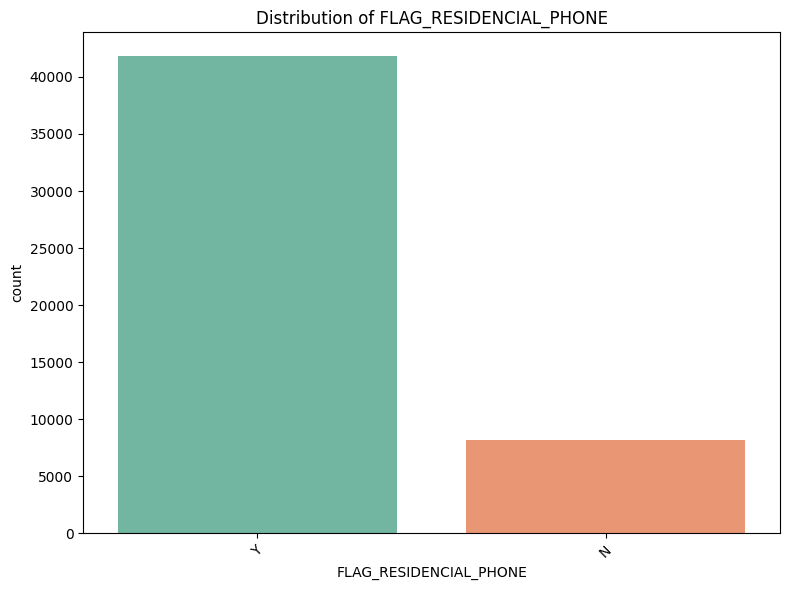

Feature: RESIDENCIAL_PHONE_AREA_CODE (Unique Values: 102)
Top 10 Most Frequent Categories:
RESIDENCIAL_PHONE_AREA_CODE
       8212
5      4558
97     2865
107    2830
54     2297
105    1626
58     1457
84     1421
20     1318
100    1231
Name: count, dtype: int64
--------------------------------------------------


C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


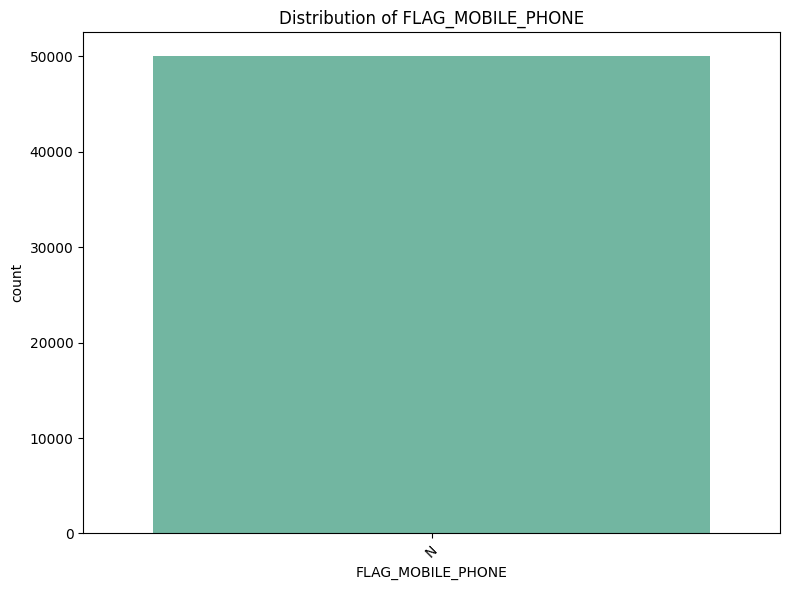

C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


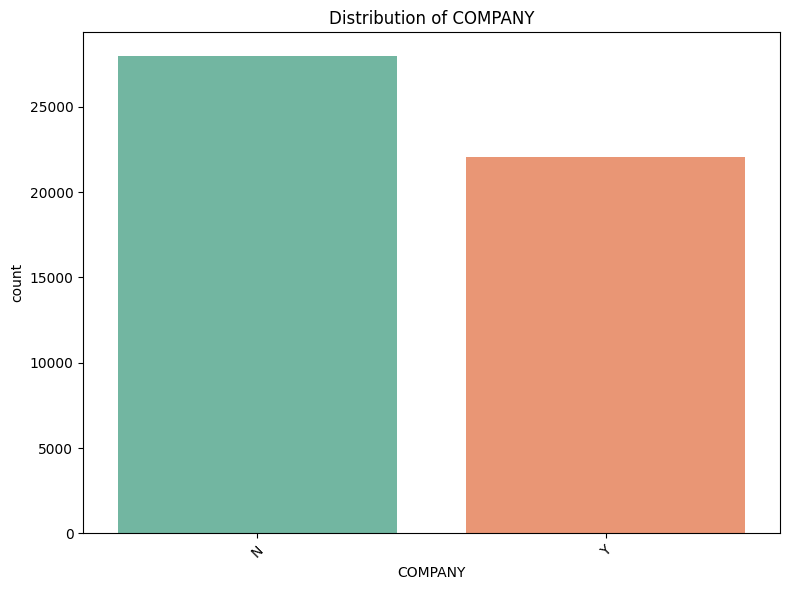

Feature: PROFESSIONAL_STATE (Unique Values: 28)
Top 10 Most Frequent Categories:
PROFESSIONAL_STATE
      34306
SP     2400
RS     2092
CE     1420
BA     1387
MG     1251
PE      902
PA      710
PR      582
RJ      570
Name: count, dtype: int64
--------------------------------------------------
Feature: PROFESSIONAL_CITY (Unique Values: 2236)
Top 10 Most Frequent Categories:
PROFESSIONAL_CITY
FORTALEZA         419
SAO PAULO         338
                  331
PELOTAS           324
PORTO ALEGRE      279
Sao Paulo         266
SALVADOR          225
RECIFE            215
RIO DE JANEIRO    195
NATAL             183
Name: count, dtype: int64
--------------------------------------------------
Feature: PROFESSIONAL_BOROUGH (Unique Values: 5057)
Top 10 Most Frequent Categories:
PROFESSIONAL_BOROUGH
CENTRO                 3727
                        930
Centro                  510
centro                  320
ZONA RURAL              288
DISTRITO INDUSTRIAL     173
CIDADE NOVA              83
INDU

C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


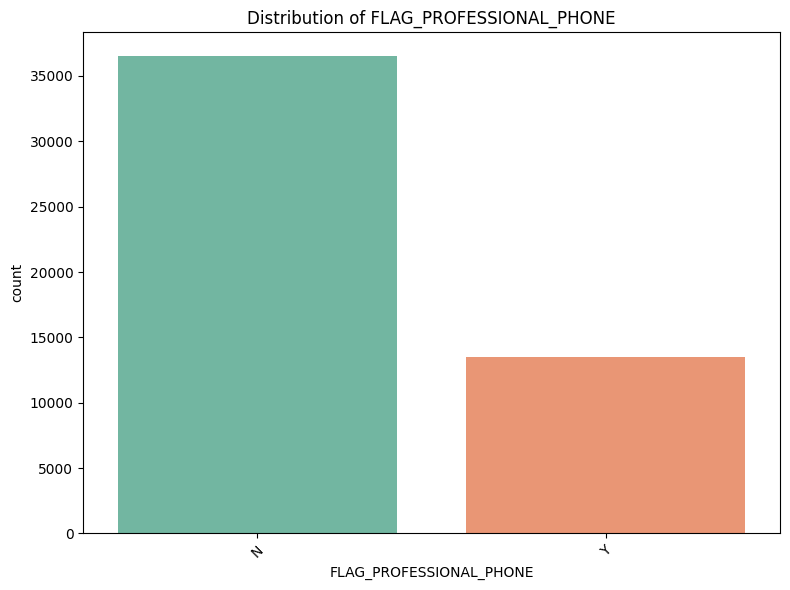

Feature: PROFESSIONAL_PHONE_AREA_CODE (Unique Values: 87)
Top 10 Most Frequent Categories:
PROFESSIONAL_PHONE_AREA_CODE
       36531
5       1457
54      1109
107      981
97       644
58       486
29       465
105      441
66       413
81       411
Name: count, dtype: int64
--------------------------------------------------


C:\Users\velve\AppData\Local\Temp\ipykernel_28124\4212648188.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)


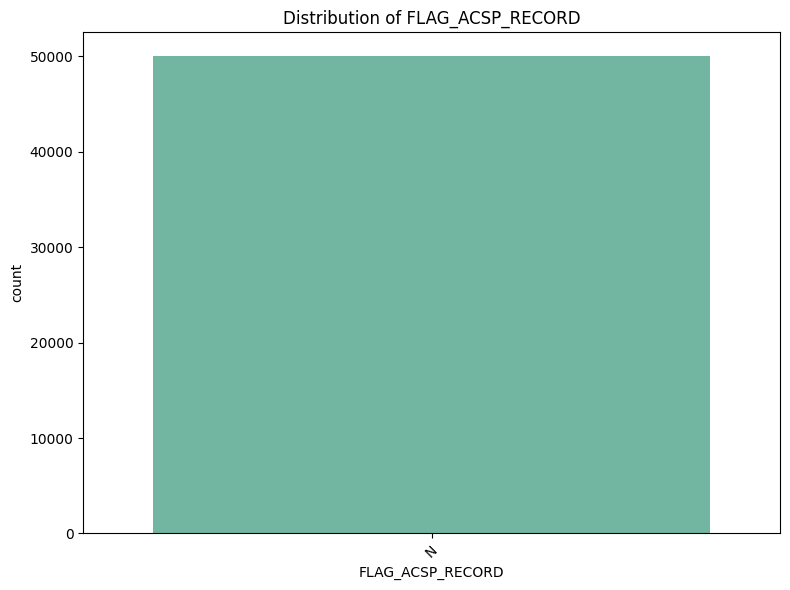

Feature: RESIDENCIAL_ZIP_3 (Unique Values: 1481)
Top 10 Most Frequent Categories:
RESIDENCIAL_ZIP_3
960    721
591    547
570    508
628    459
456    444
960    364
689    350
596    345
685    340
619    331
Name: count, dtype: int64
--------------------------------------------------
Feature: PROFESSIONAL_ZIP_3 (Unique Values: 1481)
Top 10 Most Frequent Categories:
PROFESSIONAL_ZIP_3
960    721
591    547
570    508
628    459
456    444
960    364
689    350
596    345
685    340
619    331
Name: count, dtype: int64
--------------------------------------------------


In [8]:


# Define threshold for high-cardinality features
high_cardinality_threshold = 15

# Identify categorical features
categorical_features = train_df.select_dtypes(include=['object']).columns


for col in categorical_features:
    unique_values = train_df[col].nunique()

    if unique_values <= high_cardinality_threshold:
        # Plot only if number of unique values is within threshold
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=train_df, palette='Set2', order=train_df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        # Print summary for high-cardinality categorical columns
        print(f"Feature: {col} (Unique Values: {unique_values})")
        print("Top 10 Most Frequent Categories:")
        print(train_df[col].value_counts().head(10))
        print("-" * 50)


In [9]:
from ydata_profiling import ProfileReport

# Generate a profile report
profile = ProfileReport(train_df, title="Train Data Profiling Report", explorative=True)
profile.to_widgets()  # Display the report inline (works in Jupyter notebooks)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\velve\Desktop\Playground\Sprint 5 Pipeline\.venv\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x000001E7ABE9CDF0, file "c:\Users\velve\Desktop\Playground\Sprint 5 Pipeline\.venv\lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


RESIDENCE_TYPE           1349
MONTHS_IN_RESIDENCE      3777
PROFESSIONAL_CITY       33782
PROFESSIONAL_BOROUGH    33782
PROFESSION_CODE          7756
OCCUPATION_TYPE          7313
MATE_PROFESSION_CODE    28883
UNKNOWN_FEATURE         32337
dtype: int64

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Columns to drop (those with more than 60% missing values)
columns_to_drop = missing_percentage[missing_percentage > 60].index

# Drop columns with more than 60% missing values
train_df.drop(columns=columns_to_drop, inplace=True)

# Drop column because is not relevant
train_df.drop(columns=['ID_CLIENT'], inplace=True)

# Fill missing values for the remaining columns
# For numerical columns, fill with median
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())

# For categorical columns, fill with mode
categorical_columns = train_df.select_dtypes(include=['object']).columns
train_df[categorical_columns] = train_df[categorical_columns].fillna(train_df[categorical_columns].mode().iloc[0])


In [12]:
# Drop duplicate columns by name
train_df = train_df.loc[:, ~train_df.columns.duplicated()]


In [13]:
# Drop columns with constant values (i.e., where all values are the same)
train_df = train_df.loc[:, train_df.nunique() > 1]


In [15]:
categorical_columns = train_df.select_dtypes(include=['object']).columns

In [16]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col].astype(str))


In [17]:
# Save the cleaned dataset
train_df.to_csv('cleaned_modeling_data.csv', index=False)


In [18]:
# Display dataset shape
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

# Display summary of missing values
missing_summary = train_df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("\nMissing Values Summary (Train Dataset):")
print(missing_summary)

# Display data types and basic statistics
print("\nDataset Info:")
print(train_df.info())

# Display first few rows of the processed train dataset
print("\nFirst 5 Rows of Train Dataset:")
display(train_df.head())


Train Dataset Shape: (49999, 41)
Test Dataset Shape: (19999, 53)

Missing Values Summary (Train Dataset):
Series([], dtype: int64)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PAYMENT_DAY                     49999 non-null  int64  
 1   APPLICATION_SUBMISSION_TYPE     49999 non-null  int32  
 2   POSTAL_ADDRESS_TYPE             49999 non-null  int64  
 3   SEX                             49999 non-null  int32  
 4   MARITAL_STATUS                  49999 non-null  int64  
 5   QUANT_DEPENDANTS                49999 non-null  int64  
 6   STATE_OF_BIRTH                  49999 non-null  int32  
 7   CITY_OF_BIRTH                   49999 non-null  int32  
 8   NACIONALITY                     49999 non-null  int64  
 9   RESIDENCIAL_STATE               49999 non-null  int32  
 10  RESIDENC

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,...,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,15,1,1,1,2,0,19,9354,1,18,...,0,0,11.0,4.0,11.0,1,34,111,111,1
1,5,2,1,1,2,0,20,2504,1,19,...,0,0,11.0,2.0,0.0,1,27,419,419,0
2,20,2,1,1,2,0,16,1109,1,15,...,0,0,9.0,2.0,0.0,1,61,378,378,0
3,10,2,1,2,2,0,19,5646,1,18,...,0,0,9.0,5.0,0.0,1,48,113,113,1
4,10,0,1,2,2,0,11,1463,1,10,...,0,0,9.0,2.0,0.0,2,40,230,230,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns, excluding the target column if present
num_cols = train_df.select_dtypes(include=['number']).columns.tolist()
target_col = 'TARGET_LABEL_BAD=1'  # Ensure this matches the actual target column name

if target_col in num_cols:
    num_cols.remove(target_col)  # Remove target from numerical columns

# Ensure only numerical columns are selected
train_df[num_cols] = train_df[num_cols].apply(pd.to_numeric, errors='coerce')
test_df[num_cols] = test_df[num_cols].apply(pd.to_numeric, errors='coerce')

# Outlier handling using IQR (Winsorization)
Q1 = train_df[num_cols].quantile(0.25)
Q3 = train_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier caps
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
train_df[num_cols] = train_df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)
test_df[num_cols] = test_df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Apply MinMax Scaling
scaler = MinMaxScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

# Summary
print(train_df.describe())


        PAYMENT_DAY  APPLICATION_SUBMISSION_TYPE  POSTAL_ADDRESS_TYPE  \
count  49999.000000                 49999.000000              49999.0   
mean       0.503580                     0.587442                  0.0   
std        0.294796                     0.480305                  0.0   
min        0.000000                     0.000000                  0.0   
25%        0.375000                     0.000000                  0.0   
50%        0.375000                     1.000000                  0.0   
75%        0.625000                     1.000000                  0.0   
max        1.000000                     1.000000                  0.0   

                SEX  MARITAL_STATUS  QUANT_DEPENDANTS  STATE_OF_BIRTH  \
count  49999.000000    49999.000000      49999.000000    49999.000000   
mean       0.461396        0.553200          0.221396        0.491881   
std        0.163024        0.236732          0.348720        0.287785   
min        0.000000        0.000000          0.000

In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Step 1: Prepare your original dataframe for feature selection (non-destructive)
train_df_univariate = train_df.copy()
train_df_rfe = train_df.copy()
train_df_importance = train_df.copy()

# Step 2: Remove highly correlated features
# Define the correlation threshold
corr_threshold = 0.9

# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Get pairs of features with correlation greater than the threshold
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# Drop highly correlated features from the dataframes
train_df_univariate = train_df_univariate.drop(columns=to_drop)
train_df_rfe = train_df_rfe.drop(columns=to_drop)
train_df_importance = train_df_importance.drop(columns=to_drop)

# Step 3: Apply Univariate Feature Selection (SelectKBest)
X_train = train_df_univariate.drop(columns=['TARGET_LABEL_BAD=1'])
y_train = train_df_univariate['TARGET_LABEL_BAD=1']

selector_univariate = SelectKBest(score_func=f_classif, k='all')  # 'all' to get scores for all features
X_new_univariate = selector_univariate.fit_transform(X_train, y_train)

# Get the selected features
selected_features_univariate = X_train.columns[selector_univariate.get_support()]

# Save the reduced dataset
train_df_univariate = train_df_univariate[selected_features_univariate.tolist() + ['TARGET_LABEL_BAD=1']]

# Step 4: Apply Recursive Feature Elimination (RFE) using Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector_rfe = RFE(estimator=rf_model, n_features_to_select=10)  # You can change the number of features to select
X_new_rfe = selector_rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[selector_rfe.get_support()]

# Save the reduced dataset
train_df_rfe = train_df_rfe[selected_features_rfe.tolist() + ['TARGET_LABEL_BAD=1']]

# Step 5: Apply Feature Importance using RandomForestClassifier
# Fitting the model to get feature importance
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

# Get the indices of the most important features
indices = importances.argsort()[::-1]
selected_features_importance = X_train.columns[indices][:10]  # Selecting top 10 features

# Save the reduced dataset
train_df_importance = train_df_importance[selected_features_importance.tolist() + ['TARGET_LABEL_BAD=1']]

# Step 6: Save the dataframes as CSV files for later use
train_df_univariate.to_csv('train_df_univariate.csv', index=False)
train_df_rfe.to_csv('train_df_rfe.csv', index=False)
train_df_importance.to_csv('train_df_importance.csv', index=False)

# Summary
print("Feature Selection Completed.")
print("Univariate features:", selected_features_univariate)
print("RFE features:", selected_features_rfe)
print("Importance features:", selected_features_importance)


c:\Users\velve\Desktop\Playground\Sprint 5 Pipeline\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  8 12 14 16 18 19 20 21 22 23 25 30 31 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\velve\Desktop\Playground\Sprint 5 Pipeline\.venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Feature Selection Completed.
Univariate features: Index(['PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'POSTAL_ADDRESS_TYPE',
       'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'STATE_OF_BIRTH',
       'CITY_OF_BIRTH', 'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE',
       'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',
       'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_STATE',
       'FLAG_PROFESSIONAL_PHONE', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE',
       'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE', 'PRODUCT', 'AGE',
       'RESIDENCIAL_ZIP_3'],
      dtype='object')
RFE features: Index(['PAYMENT_DAY', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH',

In [21]:
from pycaret.classification import *

# Load the dataset of your choice (e.g., train_df_univariate.csv)
# You can choose any of the feature-selected datasets: train_df_univariate, train_df_rfe, train_df_importance
train_data = pd.read_csv('train_df_univariate.csv')  # Change to your selected CSV if needed

# Initialize the PyCaret environment
clf1 = setup(data=train_data, target='TARGET_LABEL_BAD=1', 
             session_id=42,  # For reproducibility
             normalize=True,  # Optional: Normalize features
             transformation=True,  # Optional: Apply transformations to features
             ignore_features=['column_to_ignore'],  # Optional: List any columns to ignore
             html=False)  # Disable HTML output (useful for Jupyter)

# Compare different classification models
top_models = compare_models(n_select=3)  # Get the top 3 models

# Evaluate the top 3 models
for model in top_models:
    evaluate_model(model)

# Choose the best performing model (based on your evaluation)
best_model = top_models[0]  # Choose the top-performing model manually after evaluating

# Finalize the best model (train on entire dataset)
final_model = finalize_model(best_model)

# Save the finalized best model
save_model(final_model, 'final_best_model')

# Print the final model's name
print("Final model saved as 'final_best_model.pkl'")

# Optionally, you can make predictions now if you wish
# predictions = predict_model(final_model, data=test_df)  # Replace test_df with your test data


                    Description               Value
0                    Session id                  42
1                        Target  TARGET_LABEL_BAD=1
2                   Target type              Binary
3           Original data shape         (49999, 38)
4        Transformed data shape         (49999, 38)
5   Transformed train set shape         (34999, 38)
6    Transformed test set shape         (15000, 38)
7               Ignore features                   1
8              Numeric features                  37
9                    Preprocess                True
10              Imputation type              simple
11           Numeric imputation                mean
12       Categorical imputation                mode
13               Transformation                True
14        Transformation method         yeo-johnson
15                    Normalize                True
16             Normalize method              zscore
17               Fold Generator     StratifiedKFold
18          

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7393  0.6347  0.0100  0.5351   
lr                    Logistic Regression    0.7392  0.5919  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.7392  0.5231  0.0000  0.0000   
ridge                    Ridge Classifier    0.7392  0.5919  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.7392  0.5919  0.0000  0.0000   
dummy                    Dummy Classifier    0.7392  0.5000  0.0000  0.0000   
lightgbm  Light Gradient Boosting Machine    0.7389  0.6321  0.0274  0.4956   
ada                  Ada Boost Classifier    0.7380  0.6222  0.0150  0.4260   
rf               Random Forest Classifier    0.7371  0.6117  0.0289  0.4412   
nb                            Naive Bayes    0.7365  0.5853  0.0169  0.3829   
et                 Extra Trees Classifier    0.7348  0.5930  0.0321  0.3981   
knn                K Neighbors Classifier    0.6953 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved
Final model saved as 'final_best_model.pkl'


In [22]:
predictions = predict_model(final_model, data=test_df)  # Replace test_df with your test data
predictions

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,prediction_label,prediction_score
0,70002,C,0.375,NaN,NaN,0.0,NaN,0.285714,0.0,3,...,0,0,0,0.0,N,0.4375,0.218159,0.218159,0,0.7023
1,70003,C,1.000,NaN,NaN,0.0,NaN,0.571429,0.0,4,...,0,0,0,0.0,N,0.4000,0.902900,0.902900,0,0.7238
2,70004,C,0.125,NaN,NaN,0.0,NaN,0.285714,0.0,3,...,0,0,0,0.0,N,0.4875,1.095839,1.095839,0,0.8545
3,70005,C,0.875,NaN,NaN,0.0,NaN,0.285714,0.0,4,...,0,0,0,0.0,N,0.5375,0.364439,0.364439,0,0.7416
4,70006,C,0.375,NaN,NaN,0.0,NaN,0.571429,0.0,4,...,0,0,0,0.0,Y,0.3375,0.918033,0.918033,0,0.7927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,89996,C,1.000,NaN,NaN,0.0,NaN,0.285714,0.0,4,...,0,0,0,0.0,N,0.2250,0.689786,0.689786,0,0.6090
19995,89997,C,0.375,NaN,NaN,0.0,NaN,0.285714,0.0,2,...,0,0,0,0.0,Y,0.2750,0.189155,0.189155,0,0.6062
19996,89998,C,0.625,NaN,NaN,0.0,NaN,0.285714,0.0,4,...,0,0,0,0.0,N,0.2000,0.981084,0.981084,0,0.7485
19997,89999,C,0.375,NaN,NaN,0.0,NaN,0.571429,0.0,2,...,0,0,0,0.0,N,0.6625,1.078184,1.078184,0,0.9221
